In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [26]:
# i0 = 1.2 * (10**-3)
i0 = 2.55
alpha = 2
F = 96485
R = 8.314
T = 298


#Ciref = 10**-3
CO = 0.26 #mol/m3
CR = (10**-4)

# Eeq = 0.203 - ((R*T)/(n*F))*np.log(CR/CO)
Eeq = 0.203 
# Ect = np.array([-1.1,-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9,1.1])
Ect = -1.1
OV = -0.075
# OV = Ect-Eeq

#step = 10 #2 minutes
#time_step = np.arange(0,60.001*60,step)
step = 10
Ntsteps = 360
time_step = np.linspace(0, 60*60, Ntsteps)

concO2 = np.array([0.26])
BC1 = concO2[0] #Boundary condition 1
concOH = np.array([10**-4])

current = np.array([0])
O2_limit = 10**-20
#print (time_step)

In [28]:
for i,t in enumerate(time_step):
    if i == len(time_step) - 1:
        break
    
    # Make this a function
    iloc = i0*((concOH[i]*np.exp((alpha*F*OV)/(R*T))) - (concO2[i]*np.exp((-(alpha)*F*OV)/(R*T))))
    RO2 = -1*abs(iloc)/(F*4) #Rate of O2 consumption or flux at the surface 

    ROH = 4*abs(iloc)/(F*4) #Rate of OH production
    newCurrent = iloc*0.0104
    current = np.append(current, newCurrent)
    
    #Concentration of oxygen
#     Do not calculate the new conc
    new_concO2 = (RO2*step) + concO2[i] #Nerst equation to calculate new concentration (Boundary condition 2)
    if new_concO2 <= O2_limit:
        concO2 = np.append(concO2, min(concO2))
        
        #Calculate the New conc of OH based on O2_limit
        concOH = np.append(concOH, max(concOH))
    else:
        concO2 = np.append(concO2, new_concO2)
        #Concentration of hydroxide
        new_concOH = (ROH*step) + concOH[i]
        concOH = np.append(concOH, new_concOH)
    

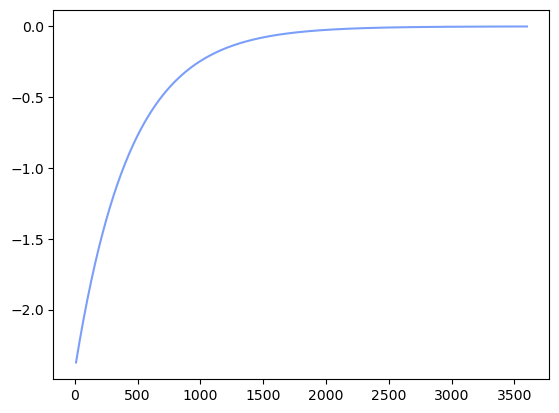

In [23]:
plt.plot(time_step[1:],current[1:])

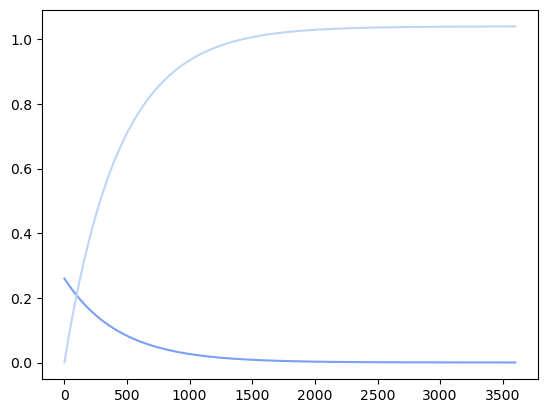

In [24]:
plt.plot(time_step,concO2,time_step,concOH)

In [6]:
DO2= 2.9e-9 #m2/s
step_x = 10 #2 minutes
x_step = np.arange(0,60.001*60,step_x)
for i,t in enumerate(time_step):
    for j,x in enumerate(x_step):
        cO2[i,j]= R(x_step)**2/DO2 + cO2[i,j-1]
        
        
    

TypeError: 'float' object is not callable

0.10498161559888579
[0.26       0.23617613 0.21266739 0.18977676 0.16778378 0.14693485
 0.12743572 0.10944661 0.09308025 0.07840272 0.06543692 0.05416833
 0.04455245 0.03652337 0.03000287 0.02490944 0.02116659 0.01871014
 0.01749396 0.01749396]


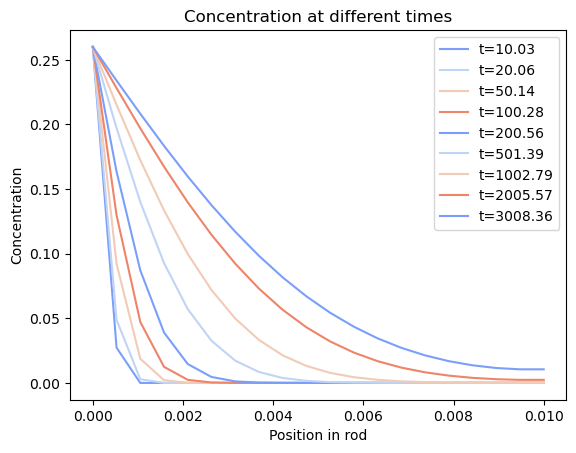

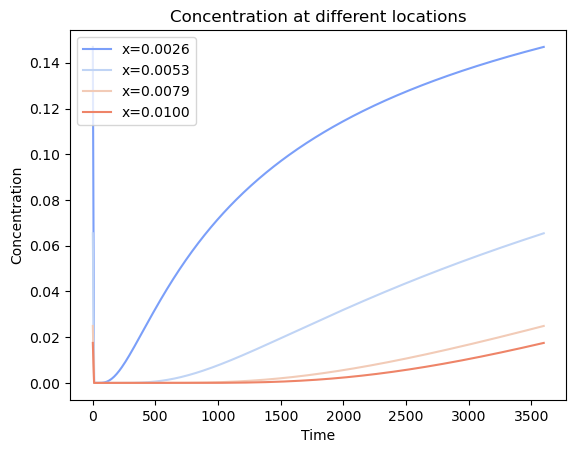

In [31]:
N = 20  # number of points to discretize
L = 0.01
X = np.linspace(0, L, N)  # position along the rod
h = L / (N - 1)  # discretization spacing

C0t = 0.26  # concentration at x = 0
D = 2.9*10**-9  # Diffusivity.  (Try increasing this to 0.028 or higher....)

tfinal = 3600
Ntsteps = 360
dt = tfinal / (Ntsteps-1)
t = np.linspace(0, tfinal, Ntsteps)
#print(t)
alpha = D * dt / h**2
print(alpha)

C_xt = []  # container for all the time steps
R=0.0005914625586516863
# initial condition at t = 0
C = np.zeros(X.shape)
C[0] = C0t

C_xt += [C]

for j in range(1, Ntsteps):
    N = np.zeros(C.shape)
    N[0] = C0t
    N[1:-1] = alpha * C[2:] + (1 - 2 * alpha) * C[1:-1] + alpha * C[0:-2] #+ (R*Ntsteps)
    N[-1] = N[-2]  # derivative boundary condition flux = 0
    C[:] = N
    C_xt += [N]

    # plot selective solutions
    # sns.set_palette(sns.color_palette("coolwarm",10))
    if j in [1, 2, 5, 10, 20, 50, 100, 200, 300]:
        plt.plot(X, N, label="t={0:1.2f}".format(t[j]))
print(N)
plt.xlabel("Position in rod")
plt.ylabel("Concentration")
plt.title("Concentration at different times")
plt.legend(loc="best")
plt.show()


C_xt = np.array(C_xt)
plt.figure()
# sns.set_palette(sns.color_palette("coolwarm",4))
plt.plot(t, C_xt[:, 5], label="x={0:1.4f}".format(X[5]))
plt.plot(t, C_xt[:, 10], label="x={0:1.4f}".format(X[10]))
plt.plot(t, C_xt[:, 15], label="x={0:1.4f}".format(X[15]))
plt.plot(t, C_xt[:, 19], label="x={0:1.4f}".format(X[19]))
plt.legend(loc="best")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("Concentration at different locations")
plt.show()